# Mục mới

In [16]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 

from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical

In [17]:
trainset='/content/drive/MyDrive/Colab Notebooks/python/train'
validationset='/content/drive/MyDrive/Colab Notebooks/python/validation'

In [18]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [19]:
train_data=train.flow_from_directory(trainset,
                                      target_size=(150,150),
                                      batch_size=10,
                                      class_mode='categorical',
                                    )
validation_data=validation.flow_from_directory(validationset,
                                              target_size=(150,150),
                                              batch_size=10,
                                              class_mode='categorical',
                                              )

Found 71 images belonging to 2 classes.
Found 7 images belonging to 1 classes.


In [20]:
print(train_data.class_indices)
print(validation_data.class_indices)

{'son': 0, 'vat': 1}
{'test': 0}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
from keras.layers.core.flatten import Flatten
model = Sequential()
model.add(Flatten(input_shape=(150,150,3)))
model.add(Dense(784,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='Softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 67500)             0         
                                                                 
 dense_4 (Dense)             (None, 784)               52920784  
                                                                 
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 128)               65664     
                                                                 
 dense_7 (Dense)             (None, 2)                 258       
                                                                 
Total params: 53,388,626
Trainable params: 53,388,626
Non-trainable params: 0
_________________________________________________________________


In [22]:

model.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [23]:
history=model.fit(train_data,batch_size=10,epochs=10,verbose=1,validation_data=validation_data)

Epoch 1/10
8/8 [==============================] - 42s 5s/step - loss: 69.5105 - accuracy: 0.6901 - val_loss: 14.6460 - val_accuracy: 1.0000
Epoch 2/10
8/8 [==============================] - 9s 1s/step - loss: 16.7454 - accuracy: 0.6338 - val_loss: 94.7680 - val_accuracy: 1.0000
Epoch 3/10
8/8 [==============================] - 9s 1s/step - loss: 8.4046 - accuracy: 0.8028 - val_loss: 70.3414 - val_accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 9s 1s/step - loss: 0.2090 - accuracy: 0.9859 - val_loss: 36.4771 - val_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 9s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 36.4771 - val_accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 9s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 36.4771 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 9s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 36.4771 - val_accuracy: 1.0000
Epoch 8/10
8/8 [===

In [24]:

model.save('person.h5')

In [25]:
from tensorflow.keras.models import load_model
model1=load_model('person.h5')

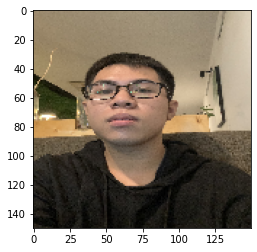

In [26]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('/content/drive/MyDrive/Colab Notebooks/python/train/son/1.jpg', target_size=(150,150))
plt.imshow(img)

array([0])

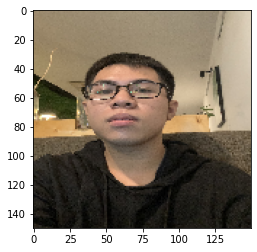

In [27]:
img=load_img('/content/2.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=1)

array([1])

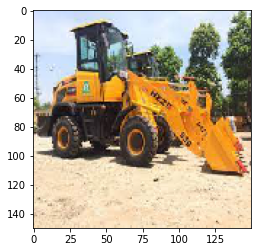

In [31]:
img=load_img('/content/xe xúc.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=1)